In [3]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
#Importar data
happiness = pd.read_csv('/content/drive/MyDrive/Tec Diplomado/C7_Prueba/Happiness_report.csv')
mexico = happiness[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region', inplace=True)
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


**Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto**

Text(6.595, 0, 'MEX')

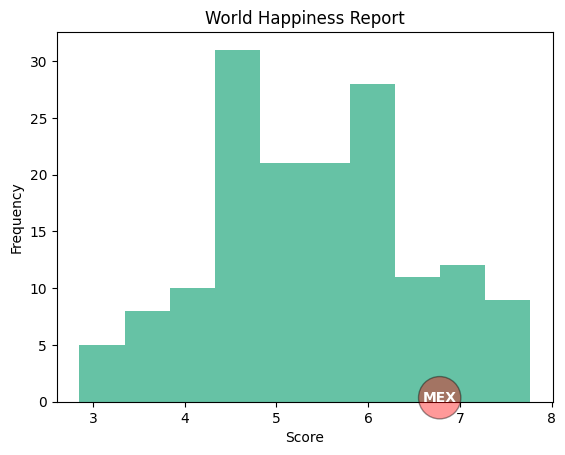

In [5]:
sns.set_palette('Set2')
plt.hist(happiness['Score'])
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('World Happiness Report')

mexico_score = mexico['Score'].to_list()[0]

props_bbox = {'boxstyle':'circle', 'facecolor':'red', 'alpha':0.4}
plt.text(mexico_score,0,'MEX',bbox=props_bbox, color='white',fontweight='bold')

**Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación**

Text(1.18, 0.861, 'MEX')

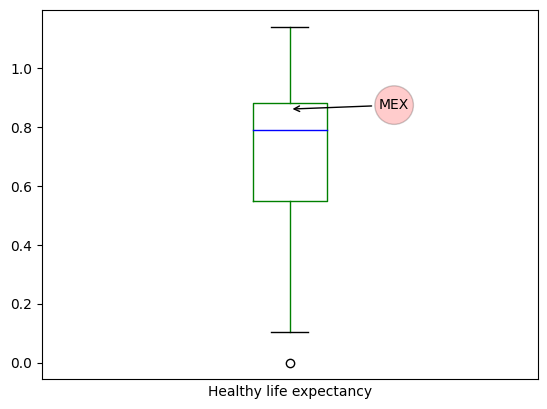

In [6]:
sns.set_palette('Set2')

plt.boxplot(
            happiness['Healthy life expectancy'].dropna(),
            labels=['2020'],boxprops=dict(color="green"),
            whiskerprops=dict(color="green"),
            medianprops=dict(color="blue")
            )
plt.xlabel('Healthy life expectancy')
plt.xticks([])

mexico_HLE = mexico['Healthy life expectancy'].to_list()[0]
plt.annotate('MEX', xy=(1,mexico_HLE),xytext=(1.18,mexico_HLE),
             arrowprops=dict(arrowstyle='->'),
             bbox=dict(facecolor='red', alpha=0.2, boxstyle='circle'))

**Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.**

,Factors
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


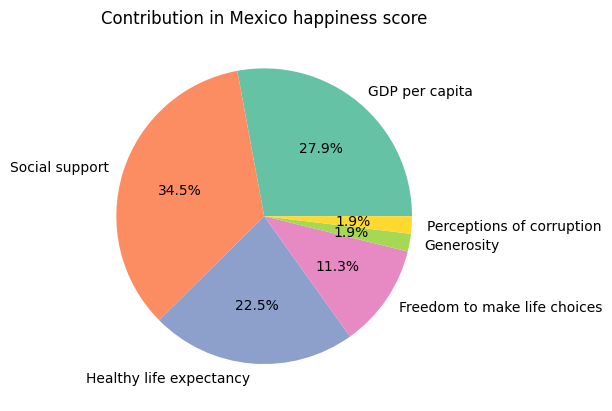

In [7]:
mexico_6 = mexico.drop(columns=['Overall rank','Score'])
mexico_6 = mexico_6.T
mexico_6.columns = ['Factors']
mexico_6.plot.pie(y='Factors',autopct='%1.1f%%')
plt.title('Contribution in Mexico happiness score')
plt.ylabel('')
plt.xlabel('')
plt.legend().remove()

mexico_6

**Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.**

Text(0.5, 1.0, 'World Happiness Report')

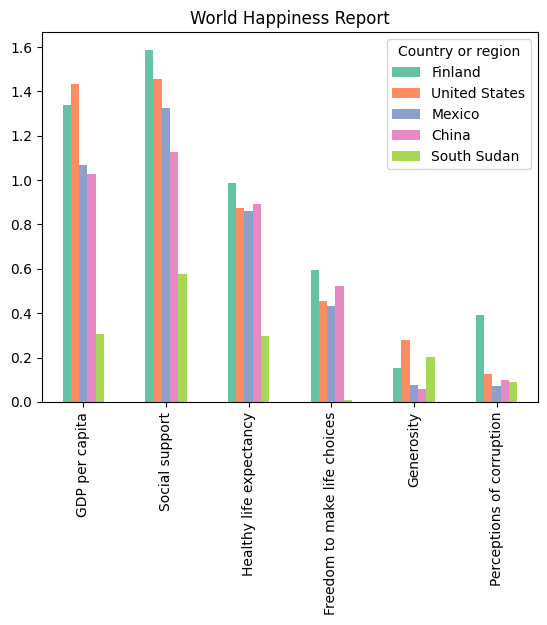

In [8]:
happiness_7 = happiness[happiness['Country or region'].isin(['Mexico','Finland','South Sudan','United States','China'])]
happiness_7.set_index('Country or region', inplace=True)
happiness_7 = happiness_7.drop(columns=['Overall rank','Score'])
happiness_7 = happiness_7.T

happiness_7.plot.bar()
plt.title('World Happiness Report')

**Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.**

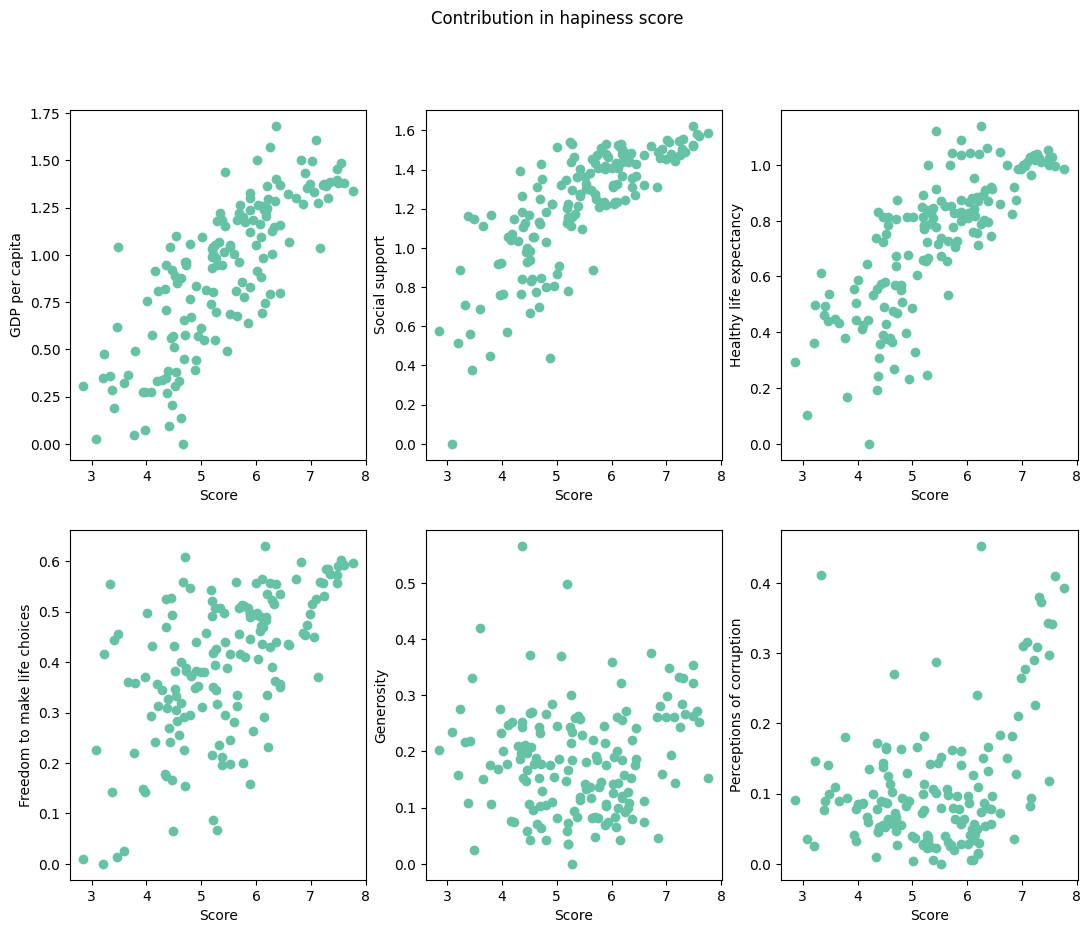

In [24]:
fig,axs = plt.subplots(2,3, figsize=(13,10))

axs[0,0].scatter(x=happiness['Score'],y=happiness['GDP per capita'])
axs[0,1].scatter(x=happiness['Score'],y=happiness['Social support'])
axs[0,2].scatter(x=happiness['Score'],y=happiness['Healthy life expectancy'])
axs[1,0].scatter(x=happiness['Score'],y=happiness['Freedom to make life choices'])
axs[1,1].scatter(x=happiness['Score'],y=happiness['Generosity'])
axs[1,2].scatter(x=happiness['Score'],y=happiness['Perceptions of corruption'])

fig.suptitle('Contribution in hapiness score')

axs[0,0].set_ylabel('GDP per capita')
axs[0,1].set_ylabel('Social support')
axs[0,2].set_ylabel('Healthy life expectancy')
axs[1,0].set_ylabel('Freedom to make life choices')
axs[1,1].set_ylabel('Generosity')
axs[1,2].set_ylabel('Perceptions of corruption')

for i in range(3):
  axs[0,i].set_xlabel('Score')
  axs[1,i].set_xlabel('Score')

**Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.**

<Axes: >

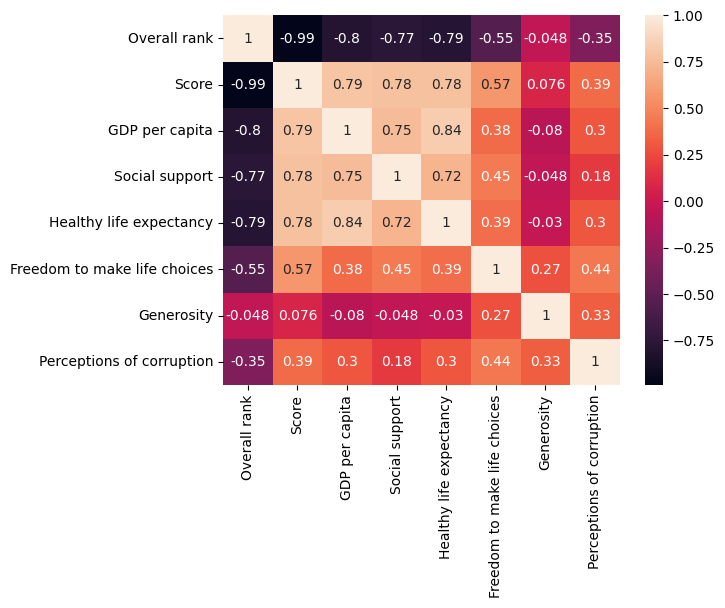

In [29]:
happiness_heat = happiness.set_index('Country or region')
happiness_heat

sns.heatmap(happiness_heat.corr(),annot=True)

**Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.**

In [51]:
metadata = pd.read_csv('/content/drive/MyDrive/Tec Diplomado/C7_Prueba/MetadataPrueba.csv')

happiness_mean = happiness
happiness_mean = happiness_mean.merge(metadata, left_on='Country or region', right_on='TableName', how='left')

happiness_mean = happiness_mean[['Region','Score']].groupby(by='Region').mean()

<ipython-input-71-708bd2cecf3c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Score', data=happiness_mean, palette='Set2')


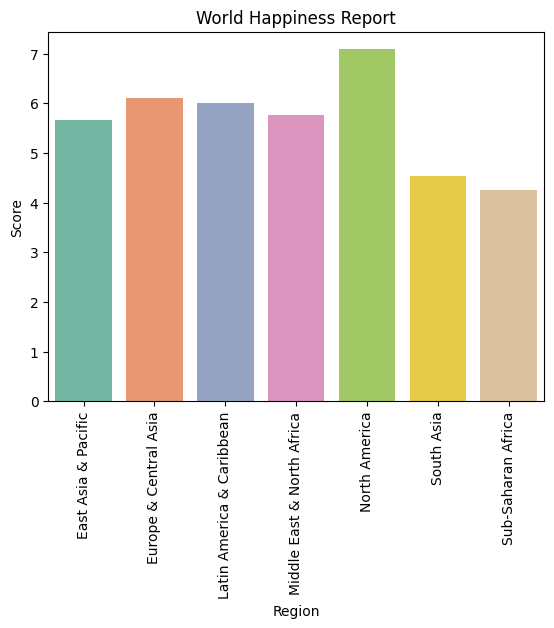

In [71]:
sns.barplot(x='Region', y='Score', data=happiness_mean, palette='Set2')
plt.title('World Happiness Report')
plt.xlabel('Region')
plt.xticks(rotation=90)
plt.ylabel('Score')
plt.legend().remove()